In [1]:
from google.colab import files
uploaded = files.upload()

Saving covid_test_results.tab to covid_test_results.tab


In [2]:
import io
import pandas as pd
import numpy as np

covid_dtypes = {'AGE': 'int32',
                'ASTHMA': 'category',
                'CARDIOVASCULAR': 'category',
                'CLASIFFICATION_FINAL': 'int32',
                'COPD': 'category',
                'DIABETES': 'category',
                'DIED': 'category',
                'HIPERTENSION': 'category',
                'ICU': 'category',
                'INMSUPR': 'category',
                'INTUBED': 'category',
                'MEDICAL_UNIT': 'int32',
                'OBESITY': 'category',
                'OTHER_DISEASE': 'category',
                'PATIENT_TYPE': 'category',
                'PNEUMONIA': 'category',
                'PREGNANT': 'category',
                'RENAL_CHRONIC': 'category',
                'REQUIRED_TREATMENT': 'category',
                'SEX': 'category',
                'TOBACCO': 'category',
                'USMER': 'int32',
                'Logistic Regression': 'category',
                'Random Forest': 'category',
                'Naive Bayes': 'category',
                'Gradient Boosting': 'category',
                'Neaural Network': 'category',
                'Random Forest Respitory': 'category',
                'Random Forest Other': 'category',
                'Random Forest Sex': 'category',
                'Gradient Boosting Respitory': 'category',
                'Gradient Boosting Respitory (1)': 'category',
                'Gradient Boosting Sex': 'category'
                }

covid_results = pd.read_table(io.BytesIO(uploaded['covid_test_results.tab']), skiprows = [1, 2], dtype = covid_dtypes) # Skip next two lines

print(covid_results.info(verbose=True))
covid_results.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235300 entries, 0 to 235299
Data columns (total 78 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   REQUIRED_TREATMENT                       235300 non-null  category
 1   PATIENT_TYPE                             235300 non-null  category
 2   INTUBED                                  43195 non-null   category
 3   ICU                                      43160 non-null   category
 4   DIED                                     235300 non-null  category
 5   DATE_DIED                                17286 non-null   object  
 6   Logistic Regression                      235300 non-null  category
 7   Logistic Regression (maybe)              235300 non-null  float64 
 8   Logistic Regression (no)                 235300 non-null  float64 
 9   Logistic Regression (yes)                235300 non-null  float64 
 10  Logistic Regression 

,REQUIRED_TREATMENT,PATIENT_TYPE,INTUBED,ICU,DIED,DATE_DIED,Logistic Regression,Logistic Regression (maybe),Logistic Regression (no),Logistic Regression (yes),...,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,no,home,NaN,NaN,no,NaN,no,0.071592,0.888791,0.039617,...,no,no,no,no,no,no,no,no,no,3
1,maybe,hospital,no,no,no,NaN,yes,0.406943,0.122739,0.470317,...,no,no,no,no,no,no,no,no,no,3
2,no,home,NaN,NaN,no,NaN,no,0.058708,0.914859,0.026432,...,no,no,no,no,no,no,yes,no,no,3
3,no,home,NaN,NaN,no,NaN,no,0.035882,0.962482,0.001636,...,no,no,no,no,no,no,no,no,no,7
4,no,home,NaN,NaN,no,NaN,no,0.031757,0.956103,0.012140,...,no,no,no,no,no,no,no,no,no,3
5,maybe,hospital,no,no,no,NaN,no,0.038925,0.954974,0.006101,...,no,no,no,no,no,no,no,no,no,7
6,no,home,NaN,NaN,no,NaN,no,0.061502,0.930066,0.008432,...,no,no,yes,no,no,no,no,no,no,7
7,no,home,NaN,NaN,no,NaN,no,0.028088,0.964751,0.007161,...,no,no,no,no,no,no,no,no,yes,3
8,no,home,NaN,NaN,no,NaN,no,0.120076,0.852137,0.027787,...,no,no,no,no,no,no,no,no,no,6
9,no,home,NaN,NaN,no,NaN,no,0.060285,0.916861,0.022854,...,no,no,no,no,no,no,no,no,no,3


In [3]:
def join_results(results):
  if all([r == "no" for r in results]):
    return "no"
  elif all([r == "yes" for r in results]):
    return "yes"
  else:
    return "maybe"


covid_results['Join Random Forest'] = covid_results[['Random Forest Respitory', 'Random Forest Other', 'Random Forest Sex']].apply(join_results, axis=1).astype("category")
covid_results['Join Random Forest and Neaural Network'] = covid_results[['Random Forest Respitory', 'Random Forest Other', 'Random Forest Sex', 'Neaural Network']].apply(join_results, axis=1).astype("category")

covid_results['Join Gradient Boosting'] = covid_results[['Gradient Boosting Respitory', 'Gradient Boosting Respitory (1)', 'Gradient Boosting Sex']].apply(join_results, axis=1).astype("category")
covid_results['Join Gradient Boosting and Neaural Network'] = covid_results[['Gradient Boosting Respitory', 'Gradient Boosting Respitory (1)', 'Gradient Boosting Sex', 'Neaural Network']].apply(join_results, axis=1).astype("category")

covid_results['Join All'] = covid_results[['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'Neaural Network', 'Random Forest Respitory', 'Random Forest Other', 'Random Forest Sex', 'Gradient Boosting Respitory', 'Gradient Boosting Respitory', 'Gradient Boosting Respitory (1)', 'Gradient Boosting Sex', 'Random Forest Respitory', 'Random Forest Other', 'Random Forest Sex']].apply(join_results, axis=1).astype("category")


print(covid_results.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235300 entries, 0 to 235299
Data columns (total 83 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   REQUIRED_TREATMENT                          235300 non-null  category
 1   PATIENT_TYPE                                235300 non-null  category
 2   INTUBED                                     43195 non-null   category
 3   ICU                                         43160 non-null   category
 4   DIED                                        235300 non-null  category
 5   DATE_DIED                                   17286 non-null   object  
 6   Logistic Regression                         235300 non-null  category
 7   Logistic Regression (maybe)                 235300 non-null  float64 
 8   Logistic Regression (no)                    235300 non-null  float64 
 9   Logistic Regression (yes)                   235300 non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235300 entries, 0 to 235299
Data columns (total 83 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   REQUIRED_TREATMENT                          235300 non-null  category
 1   PATIENT_TYPE                                235300 non-null  category
 2   INTUBED                                     43195 non-null   category
 3   ICU                                         43160 non-null   category
 4   DIED                                        235300 non-null  category
 5   DATE_DIED                                   17286 non-null   object  
 6   Logistic Regression                         235300 non-null  category
 7   Logistic Regression (maybe)                 235300 non-null  float64 
 8   Logistic Regression (no)                    235300 non-null  float64 
 9   Logistic Regression (yes)                   235300 non-null

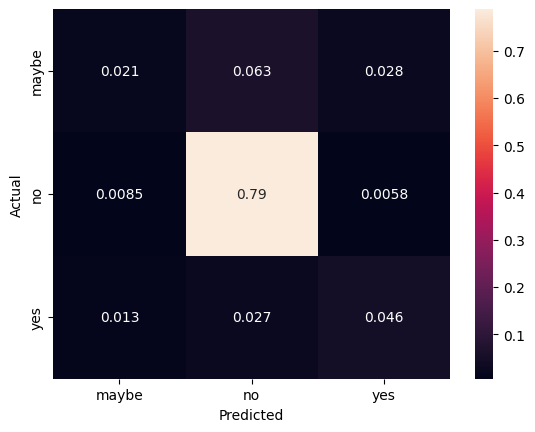


Random Forest
Predicted     maybe        no       yes
Actual                                 
maybe      0.037068  0.048432  0.026230
no         0.017017  0.776796  0.008865
yes        0.024199  0.018003  0.043391


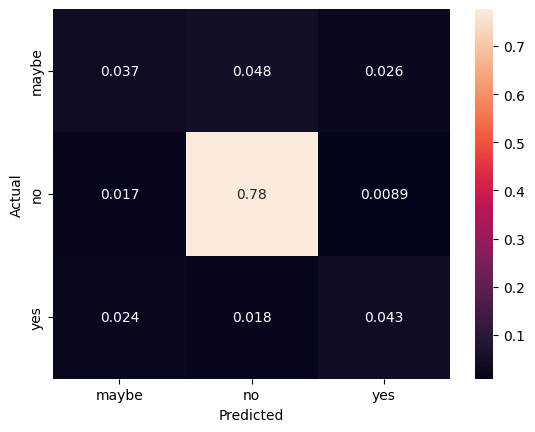


Naive Bayes
Predicted     maybe        no       yes
Actual                                 
maybe      0.026711  0.052737  0.032282
no         0.015640  0.769414  0.017624
yes        0.016260  0.019256  0.050076


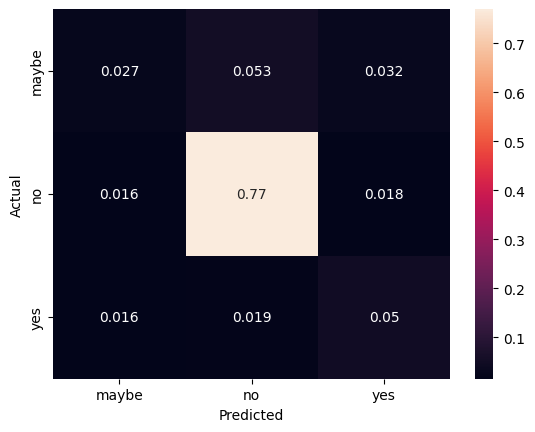


Gradient Boosting
Predicted     maybe        no       yes
Actual                                 
maybe      0.038870  0.048581  0.024280
no         0.013502  0.781840  0.007335
yes        0.021772  0.017085  0.046736


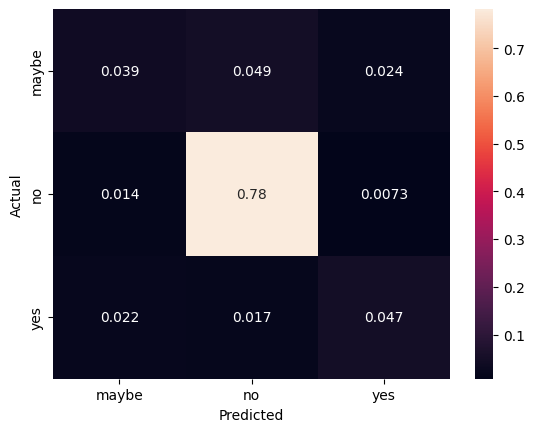


Neaural Network
Predicted     maybe        no       yes
Actual                                 
maybe      0.039044  0.049252  0.023434
no         0.013506  0.782146  0.007025
yes        0.022894  0.017752  0.044947


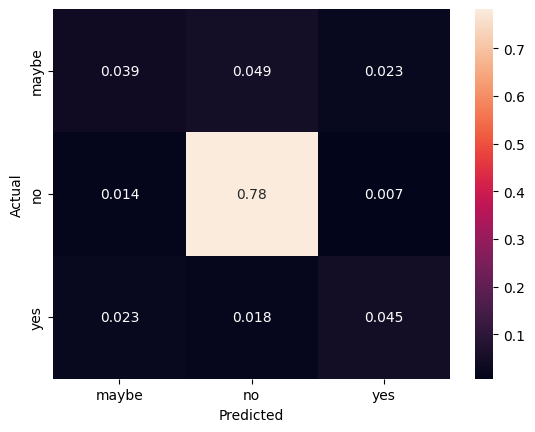


Random Forest Respitory
Predicted     maybe        no       yes
Actual                                 
maybe      0.036481  0.049907  0.025342
no         0.015495  0.779074  0.008109
yes        0.022843  0.018168  0.044581


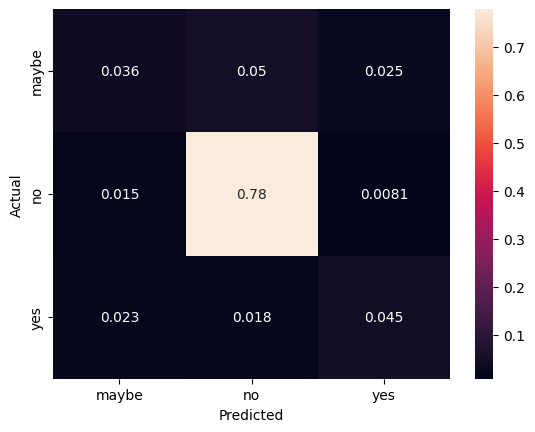


Random Forest Other
Predicted     maybe        no       yes
Actual                                 
maybe      0.013187  0.083362  0.015181
no         0.011279  0.778364  0.013034
yes        0.009125  0.048245  0.028224


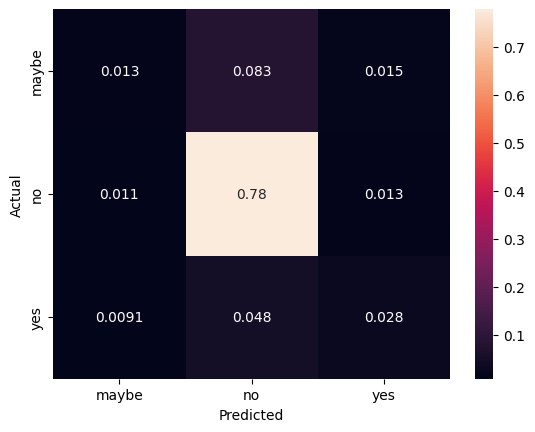


Random Forest Sex
Predicted     maybe        no       yes
Actual                                 
maybe      0.010918  0.087505  0.013306
no         0.008181  0.783638  0.010858
yes        0.006791  0.051934  0.026868


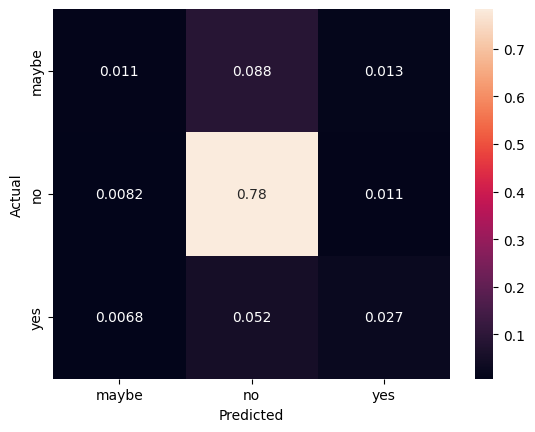


Join Random Forest
Predicted     maybe        no       yes
Actual                                 
maybe      0.063829  0.040251  0.007650
no         0.042728  0.756825  0.003124
yes        0.054598  0.011751  0.019244


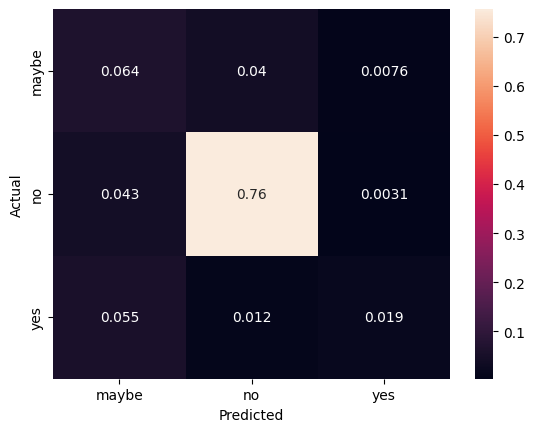


Join Random Forest and Neaural Network
Predicted     maybe        no       yes
Actual                                 
maybe      0.067246  0.037586  0.006898
no         0.045623  0.754909  0.002146
yes        0.056655  0.010756  0.018181


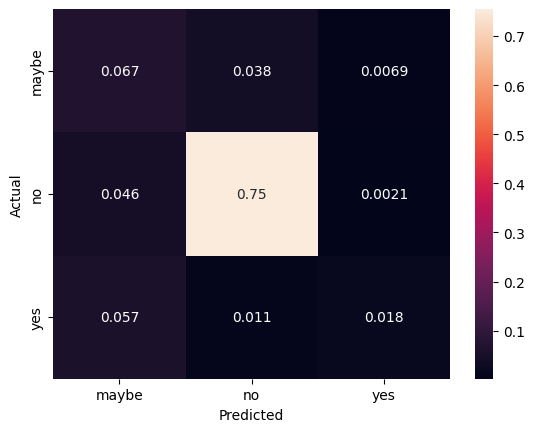


Join Gradient Boosting
Predicted     maybe        no       yes
Actual                                 
maybe      0.062673  0.040204  0.008853
no         0.035478  0.763765  0.003434
yes        0.051938  0.011572  0.022082


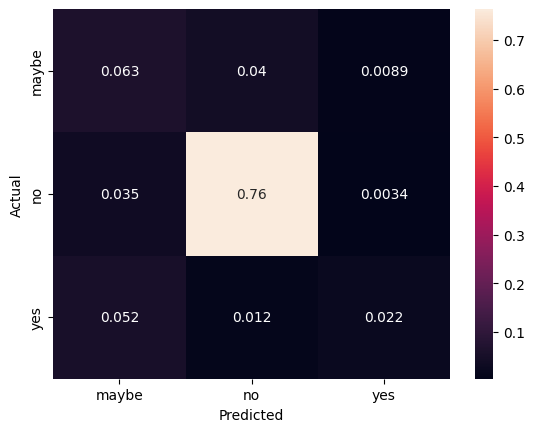


Join Gradient Boosting and Neaural Network
Predicted     maybe        no       yes
Actual                                 
maybe      0.064887  0.038717  0.008126
no         0.037612  0.762520  0.002546
yes        0.053400  0.011135  0.021058


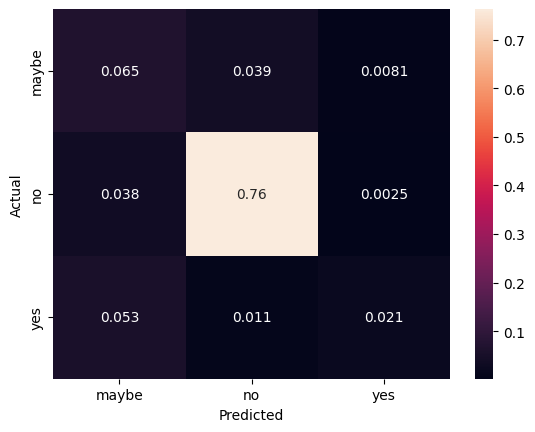


Join All
Predicted     maybe        no       yes
Actual                                 
maybe      0.074437  0.033277  0.004016
no         0.062690  0.739507  0.000480
yes        0.064373  0.008661  0.012558


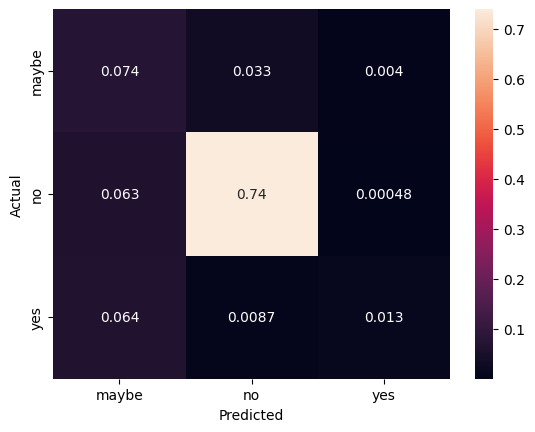

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt


print(covid_results.info(verbose=True))

def generate_confusion_matrix(predicted):
  print()
  print(predicted)
  print("=" * len(predicted))
  confusion_matrix = pd.crosstab(
      covid_results['REQUIRED_TREATMENT'],
      covid_results[predicted],
      rownames=['Actual'],
      colnames=['Predicted'],
      normalize="all")

  print(confusion_matrix)
  sn.heatmap(confusion_matrix, annot=True)
  plt.show()

for p in ['Logistic Regression',
          'Random Forest',
          'Naive Bayes',
          'Gradient Boosting',
          'Neaural Network',
          'Random Forest Respitory',
          'Random Forest Other',
          'Random Forest Sex',
          'Join Random Forest',
          'Join Random Forest and Neaural Network',
          'Join Gradient Boosting',
          'Join Gradient Boosting and Neaural Network',
          'Join All']:
  generate_confusion_matrix(p)


Logistic Regression
Predicted     maybe        no       yes
Treatment                              
home       0.008976  0.791679  0.008717
hospital   0.032992  0.086621  0.071016


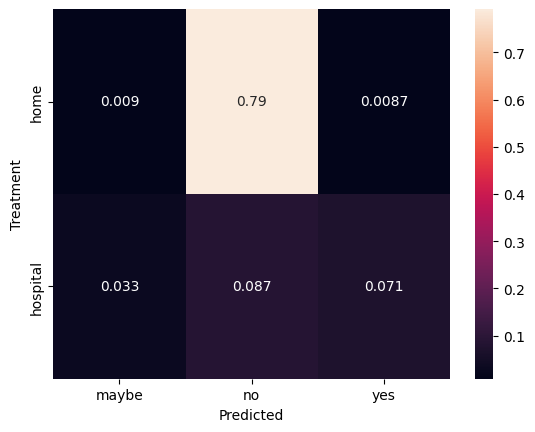


Random Forest
Predicted     maybe        no       yes
Treatment                              
home       0.018355  0.779116  0.011900
hospital   0.059928  0.064114  0.066587


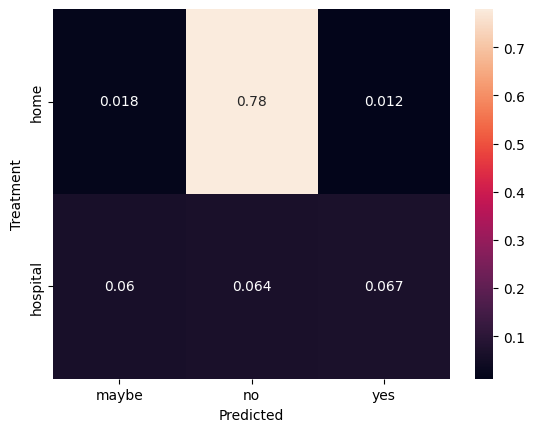


Naive Bayes
Predicted     maybe        no       yes
Treatment                              
home       0.016337  0.771827  0.021207
hospital   0.042274  0.069579  0.078776


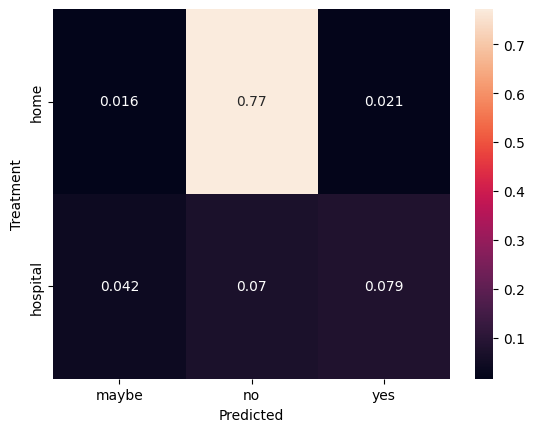


Gradient Boosting
Predicted     maybe        no       yes
Treatment                              
home       0.014416  0.784131  0.010824
hospital   0.059728  0.063374  0.067527


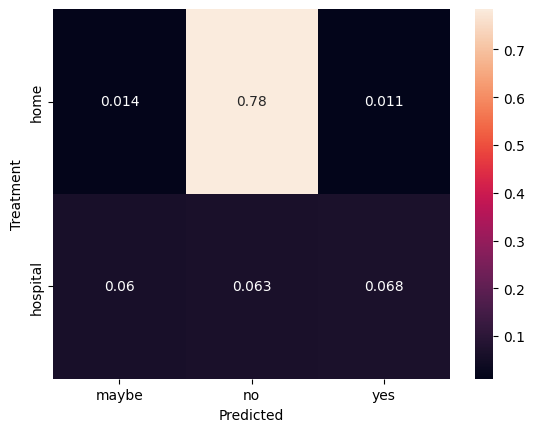


Neaural Network
Predicted     maybe        no       yes
Treatment                              
home       0.014509  0.784488  0.010374
hospital   0.060935  0.064662  0.065032


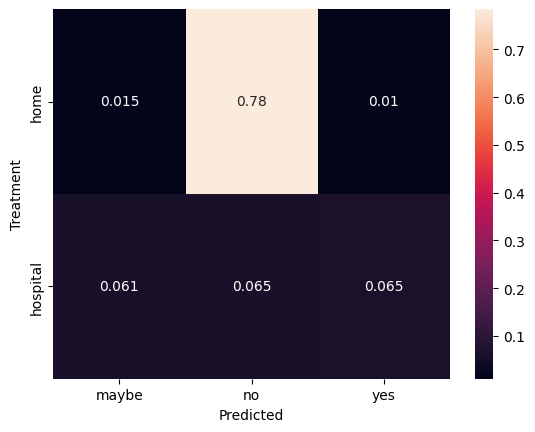


Random Forest Respitory
Predicted     maybe        no       yes
Treatment                              
home       0.016655  0.781330  0.011385
hospital   0.058164  0.065818  0.066647


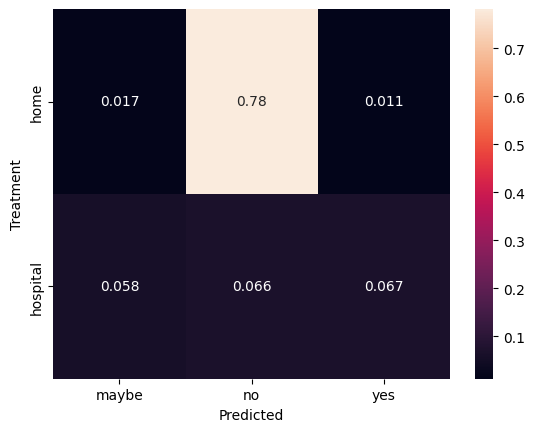


Random Forest Other
Predicted     maybe       no       yes
Treatment                             
home       0.011823  0.78201  0.015538
hospital   0.021768  0.12796  0.040901


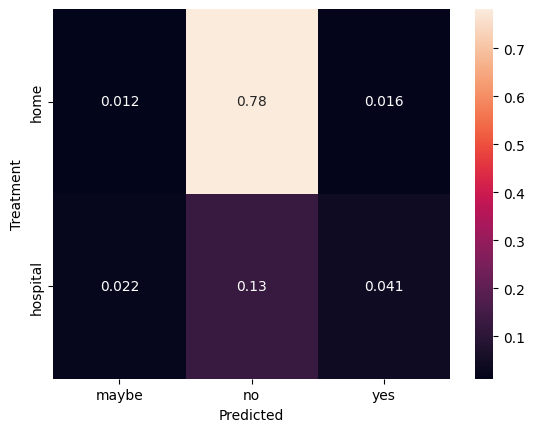


Random Forest Sex
Predicted     maybe        no       yes
Treatment                              
home       0.008564  0.787446  0.013362
hospital   0.017327  0.135631  0.037671


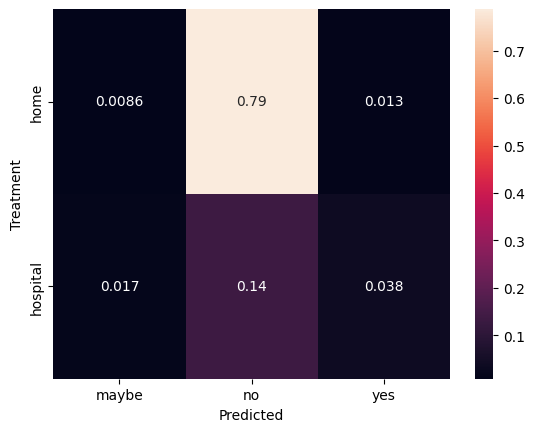


Join Random Forest
Predicted     maybe        no       yes
Treatment                              
home       0.046239  0.758279  0.004853
hospital   0.114917  0.050548  0.025164


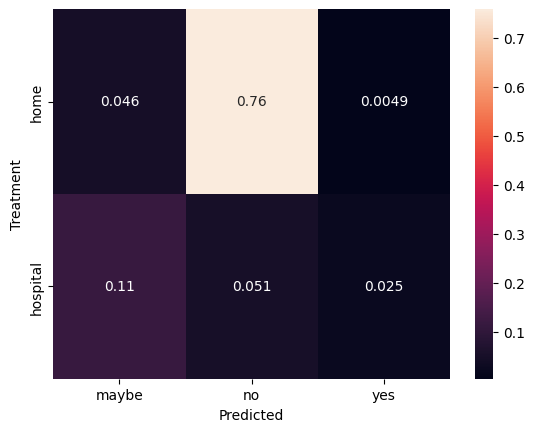


Join Random Forest and Neaural Network
Predicted     maybe        no       yes
Treatment                              
home       0.049350  0.756328  0.003693
hospital   0.120174  0.046923  0.023532


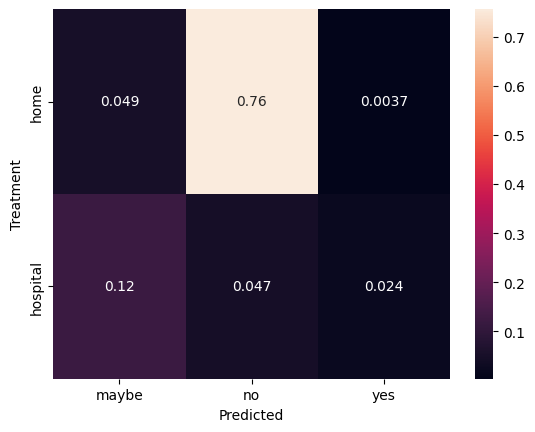


Join Gradient Boosting
Predicted     maybe        no       yes
Treatment                              
home       0.038746  0.765283  0.005342
hospital   0.111343  0.050259  0.029027


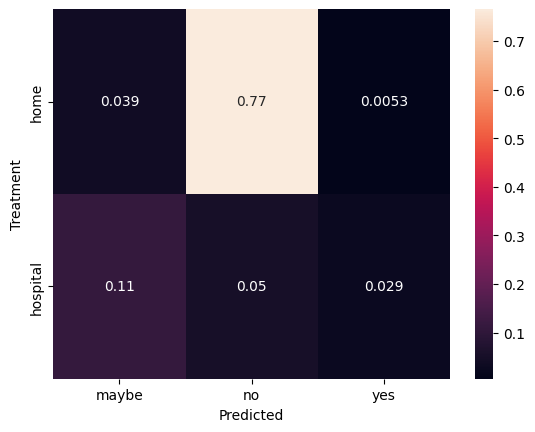


Join Gradient Boosting and Neaural Network
Predicted     maybe        no       yes
Treatment                              
home       0.041071  0.764008  0.004292
hospital   0.114828  0.048364  0.027437


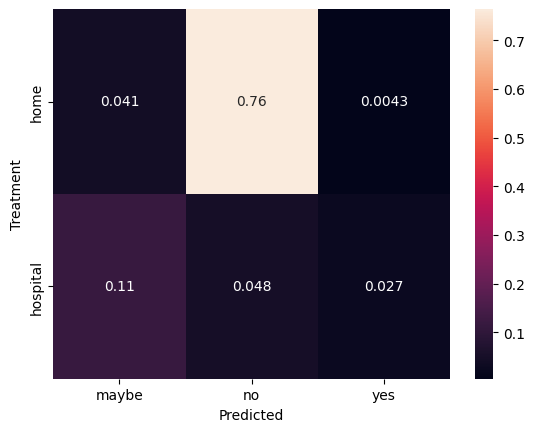


Join All
Predicted     maybe        no       yes
Treatment                              
home       0.067348  0.740676  0.001347
hospital   0.134152  0.040769  0.015708


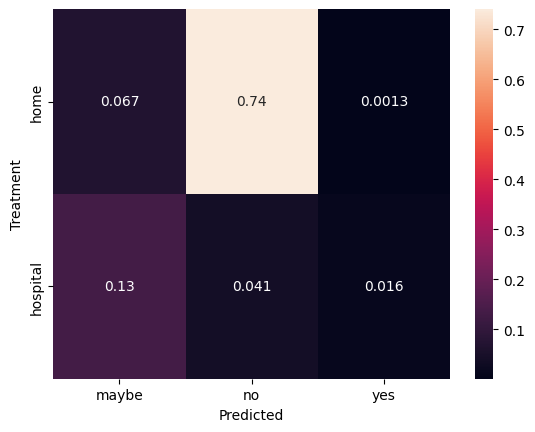

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt

def generate_confusion_matrix(predicted):
  print()
  print(predicted)
  print("=" * len(predicted))
  confusion_matrix = pd.crosstab(
      covid_results['PATIENT_TYPE'],
      covid_results[predicted],
      rownames=['Treatment'],
      colnames=['Predicted'],
      normalize="all")

  print(confusion_matrix)
  sn.heatmap(confusion_matrix, annot=True)
  plt.show()

for p in ['Logistic Regression',
          'Random Forest',
          'Naive Bayes',
          'Gradient Boosting',
          'Neaural Network',
          'Random Forest Respitory',
          'Random Forest Other',
          'Random Forest Sex',
          'Join Random Forest',
          'Join Random Forest and Neaural Network',
          'Join Gradient Boosting',
          'Join Gradient Boosting and Neaural Network',
          'Join All']:
  generate_confusion_matrix(p)


Join Random Forest
Predicted     maybe        no       yes
ICU                                    
no         0.529402  0.254263  0.128800
yes        0.069277  0.010982  0.007275


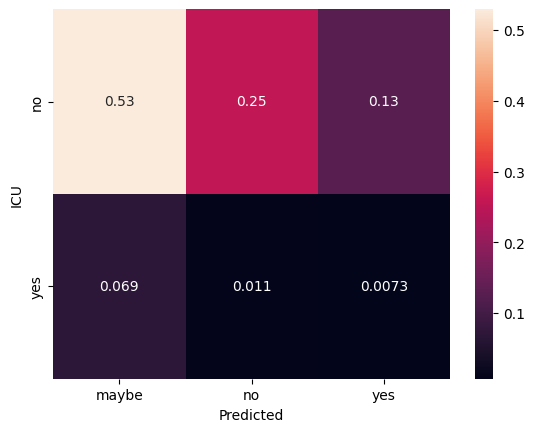


Join Random Forest and Neaural Network
Predicted     maybe        no       yes
ICU                                    
no         0.553939  0.238044  0.120482
yes        0.071339  0.009384  0.006812


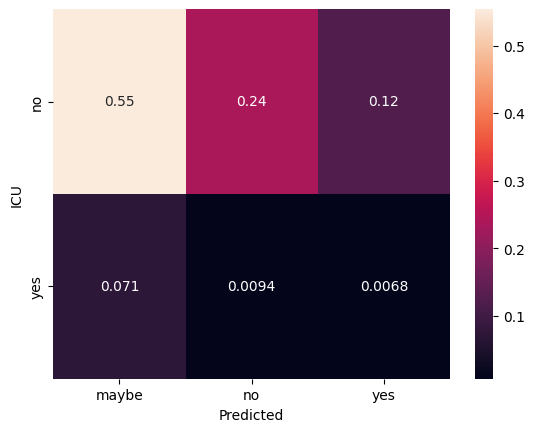


Join Gradient Boosting
Predicted     maybe        no       yes
ICU                                    
no         0.511307  0.253707  0.147451
yes        0.068003  0.010056  0.009476


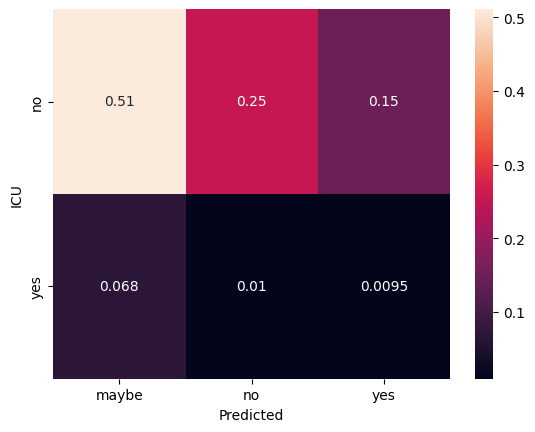


Join Gradient Boosting and Neaural Network
Predicted     maybe        no       yes
ICU                                    
no         0.527873  0.245181  0.139411
yes        0.068999  0.009569  0.008967


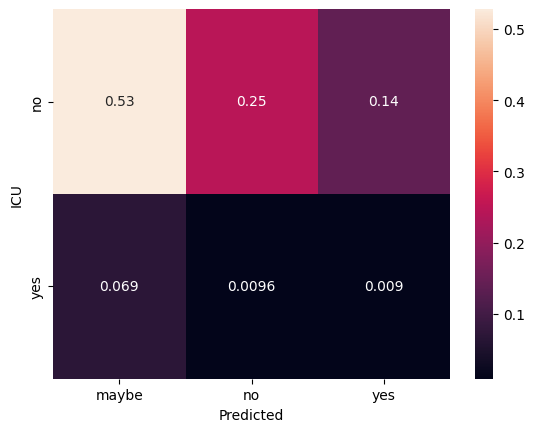


Join All
Predicted     maybe        no       yes
ICU                                    
no         0.624421  0.207530  0.080514
yes        0.075023  0.007785  0.004727


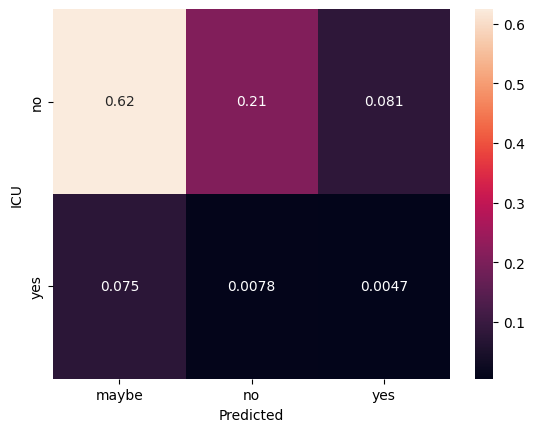

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt

def generate_confusion_matrix(predicted):
  print()
  print(predicted)
  print("=" * len(predicted))
  confusion_matrix = pd.crosstab(
      covid_results['ICU'],
      covid_results[predicted],
      rownames=['ICU'],
      colnames=['Predicted'],
      normalize="all")

  print(confusion_matrix)
  sn.heatmap(confusion_matrix, annot=True)
  plt.show()

for p in ['Join Random Forest',
          'Join Random Forest and Neaural Network',
          'Join Gradient Boosting',
          'Join Gradient Boosting and Neaural Network',
          'Join All']:
  generate_confusion_matrix(p)

# New Section